<center>

## EMG signal analysis

</center>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

## Lectura de los datos

In [2]:
# Ruta al archivo CSV
archivo_csv = 'Colecta_4.csv'
nombre_columna = 'Colecta_4' 
# Lee el archivo CSV
df = pd.read_csv(archivo_csv)

## Graficar los datos 

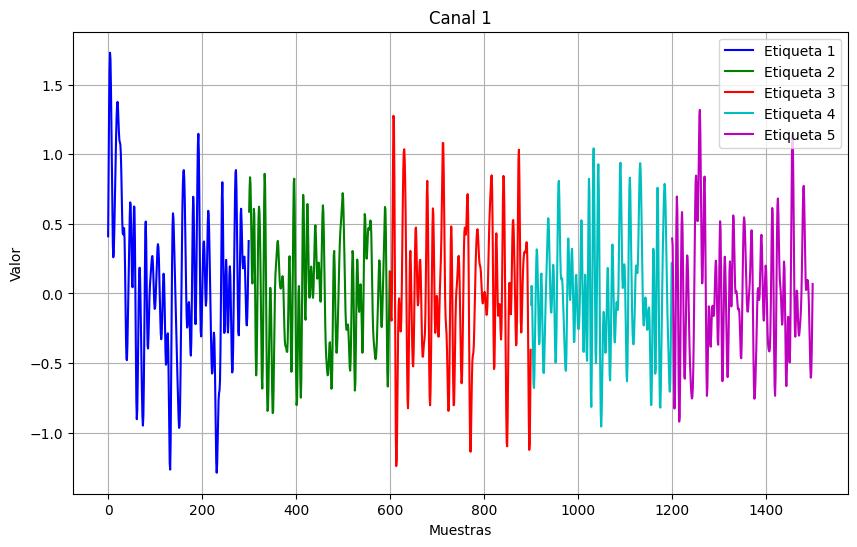

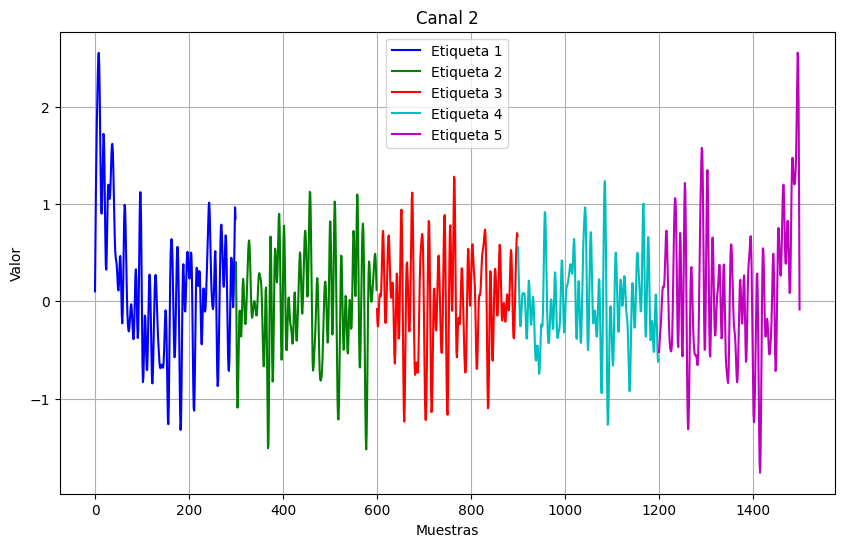

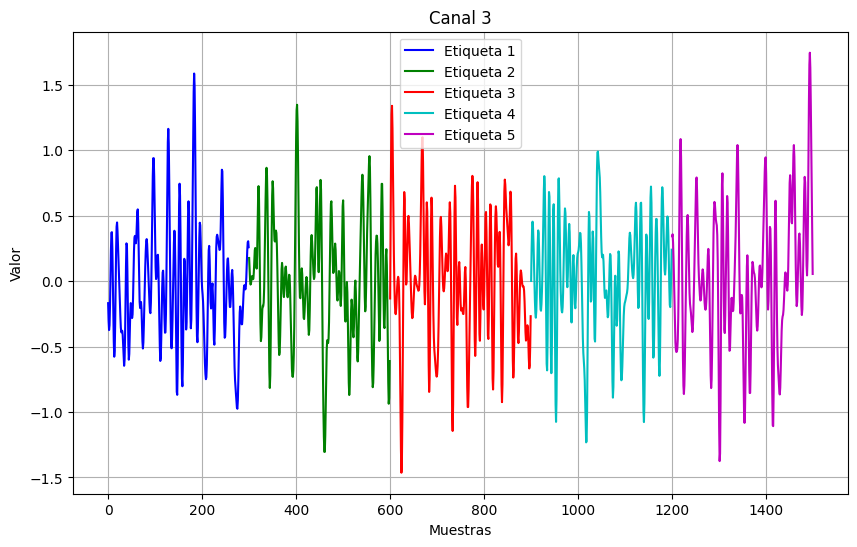

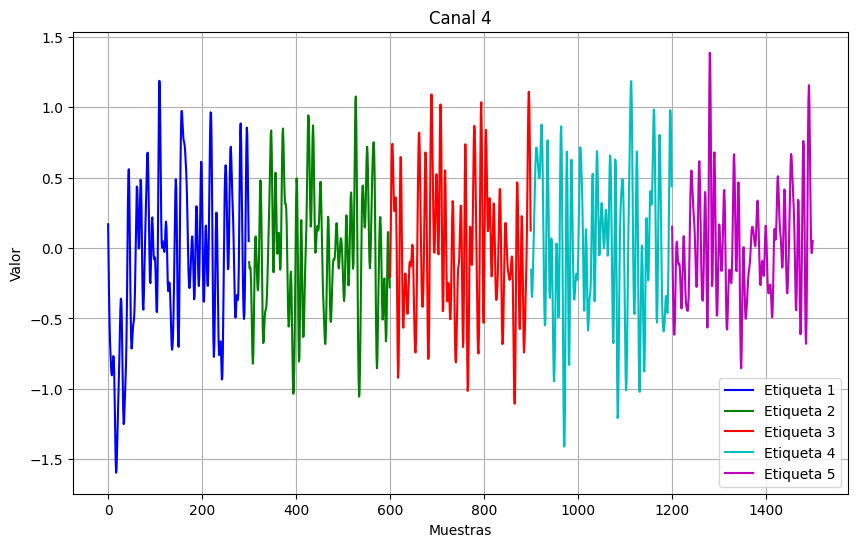

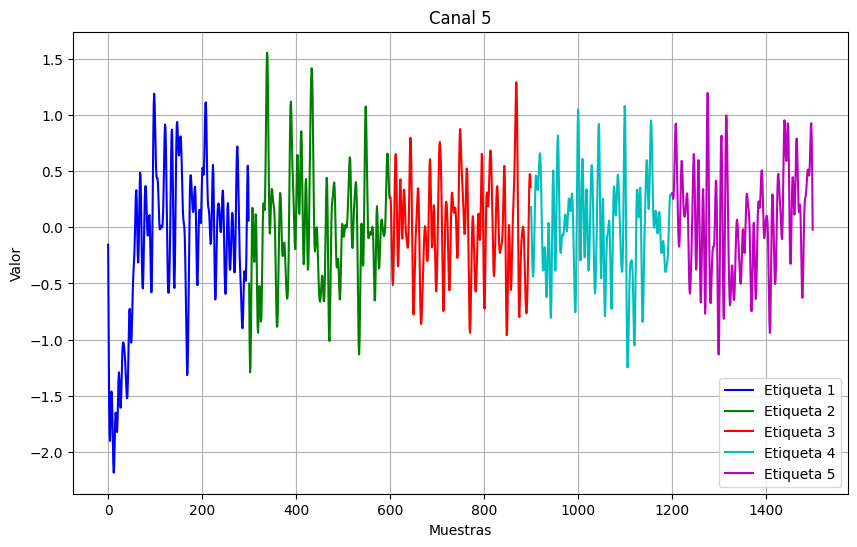

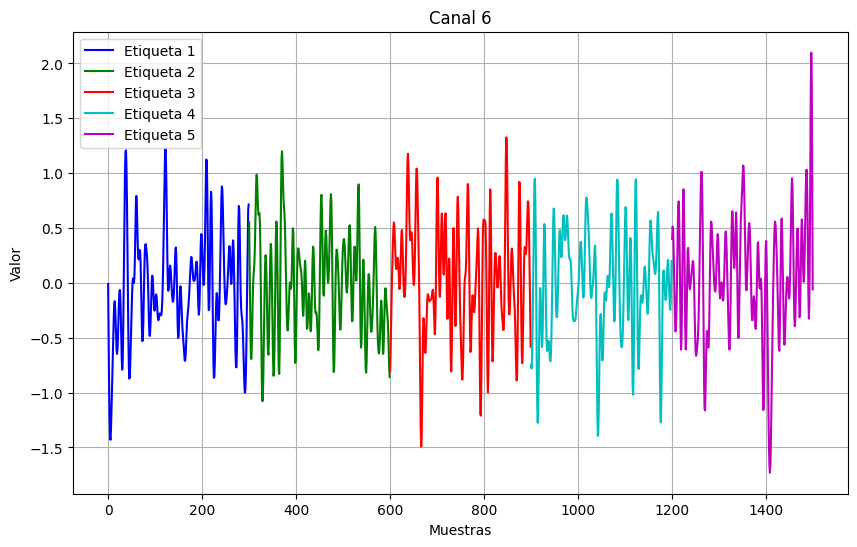

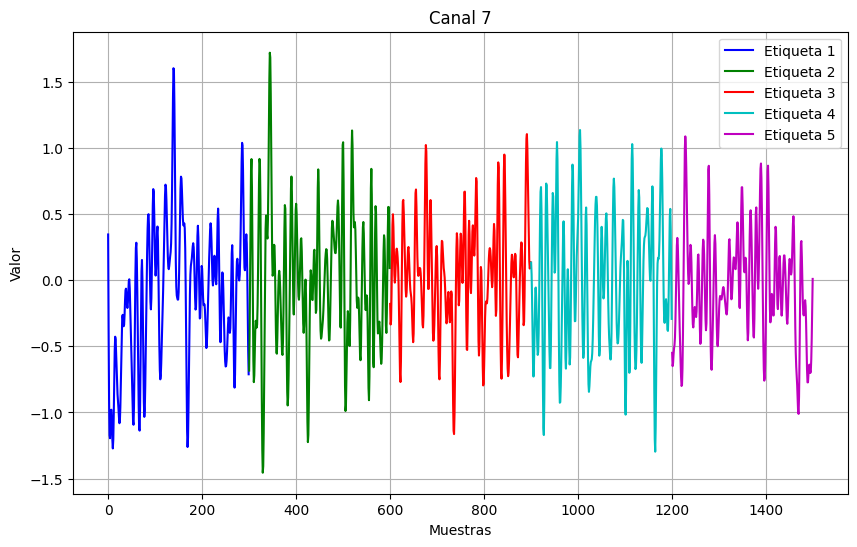

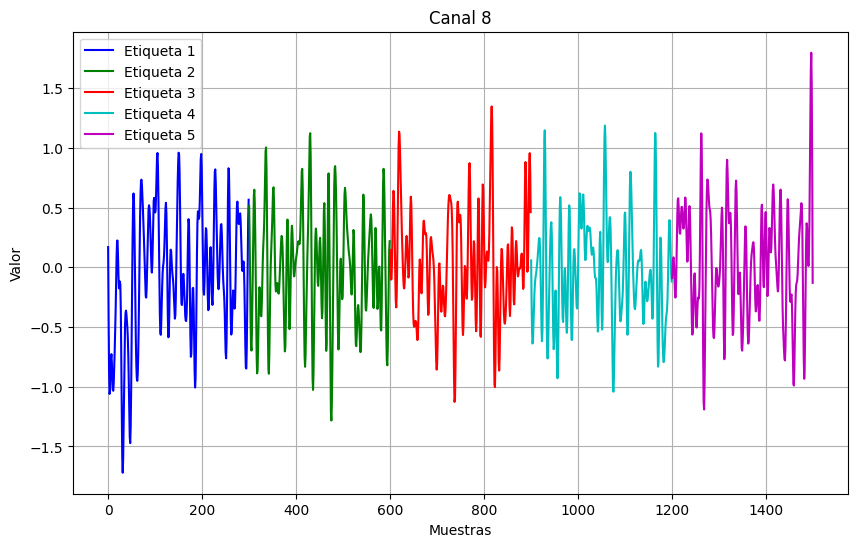

In [3]:
# Obtener los nombres de las columnas de los canales
nombres_canales = df.columns[:-1]  # Excluyendo la última columna 'Label'

# Define una lista de colores para cada segmento de 300 muestras
colores = ['b', 'g', 'r', 'c', 'm']

# Graficar los datos de cada canal con colores cambiantes cada 300 muestras
for canal in nombres_canales:
    plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura
    for i in range(0, len(df), 300):
        color = colores[i//300 % len(colores)]  # Calcula el color para el segmento actual
        plt.plot(df[canal][i:i+300], color=color, label=f'Etiqueta {i//300 + 1}')  # Grafica los datos del segmento actual con el color correspondiente y agrega la etiqueta
    plt.title(canal)  # Asigna el título al gráfico
    plt.xlabel('Muestras')  # Etiqueta del eje x
    plt.ylabel('Valor')  # Etiqueta del eje y
    plt.legend()  # Muestra la leyenda
    plt.grid(True)  # Muestra la cuadrícula
    plt.show()  # Muestra el gráfico

## Funciones para calcular las caracteristicas de los datos

In [6]:
#Funcion para calcular la caracteristica IEMG
def calcular_IEMG(ventana,ventana_numero, canal):
    iemg = np.sum(np.abs(ventana))
    print(f"El valor del IEMG de la ventana {ventana_numero} del {canal} es: {iemg:.2f}")
    return iemg

#Funcion para calcular la caracteristica MAV
def calcular_mav(ventana,ventana_numero, canal):
    mav = (np.sum(np.abs(ventana)))/len(ventana)
    print(f"El valor del MAV de la ventana {ventana_numero} del {canal} es: {mav:.2f}")
    return mav

#Funcion para calcular la caracteristica  MAV1
def calcular_mav1(ventana, ventana_numero, canal):
    N = len(ventana) #Numero de datos o tamaño de la ventana
    w = np.ones(N)  # Inicializa el vector de pesos con unos
    for i in range(N):
        if i >= 0.25*N and i <= 0.75*N:
            w[i] = 1
        else:
            w[i] = 0.5
    mav1 = np.sum(w * np.abs(ventana)) / N
    print(f"El valor del MAV1 de la ventana {ventana_numero} del {canal} es: {mav1:.2f}")
    return mav1

#Funcion para calcular la caracteristica  MAV2
def calcular_mav2(ventana, ventana_numero, canal):
    N = len(ventana) #Numero de datos o tamaño de la ventana
    w = np.ones(N)  # Inicializa el vector de pesos con unos
    for i in range(N):
        if i >= 0.25*N and i <= 0.75*N:
            w[i] = 1
        if i < 0.25*N:
            w[i] = (4*i) / N
        else:
            w[i] = 4 * (i-N) / N
    mav2 = np.sum(w * np.abs(ventana)) / N
    print(f"El valor del MAV2 de la ventana {ventana_numero} del {canal} es: {mav2:.2f}")
    return mav2

#Funcion para calcular la caracteristica SSI
def calcular_ssi(ventana,ventana_numero, canal):
    ssi = np.sum(ventana**2)
    print(f"El valor del SSI de la ventana {ventana_numero} del {canal} es: {ssi:.2f}")
    return ssi

## Ventaneo cruces por cero y caracteristicas canal 1

El valor del IEMG de la ventana 1 del Canal 1 es: 37.77
El valor del MAV de la ventana 1 del Canal 1 es: 0.76
El valor del MAV1 de la ventana 1 del Canal 1 es: 0.58
El valor del MAV2 de la ventana 1 del Canal 1 es: -0.83
El valor del SSI de la ventana 1 del Canal 1 es: 38.65


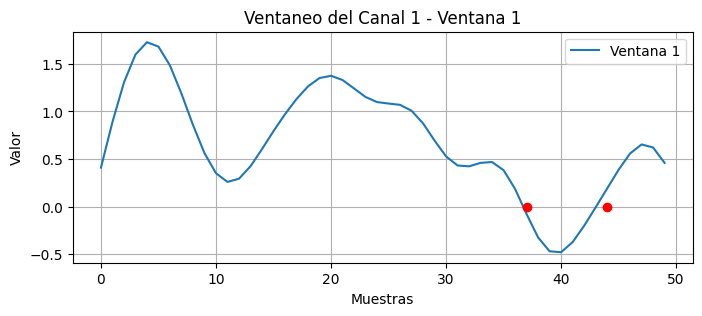

El valor del IEMG de la ventana 2 del Canal 1 es: 16.89
El valor del MAV de la ventana 2 del Canal 1 es: 0.34
El valor del MAV1 de la ventana 2 del Canal 1 es: 0.27
El valor del MAV2 de la ventana 2 del Canal 1 es: -0.33
El valor del SSI de la ventana 2 del Canal 1 es: 9.31


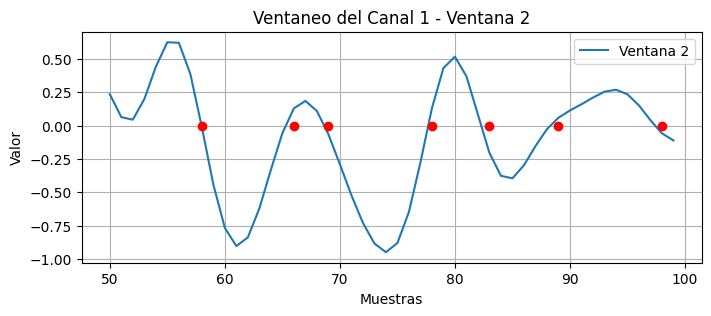

El valor del IEMG de la ventana 3 del Canal 1 es: 18.35
El valor del MAV de la ventana 3 del Canal 1 es: 0.37
El valor del MAV1 de la ventana 3 del Canal 1 es: 0.29
El valor del MAV2 de la ventana 3 del Canal 1 es: -0.40
El valor del SSI de la ventana 3 del Canal 1 es: 11.12


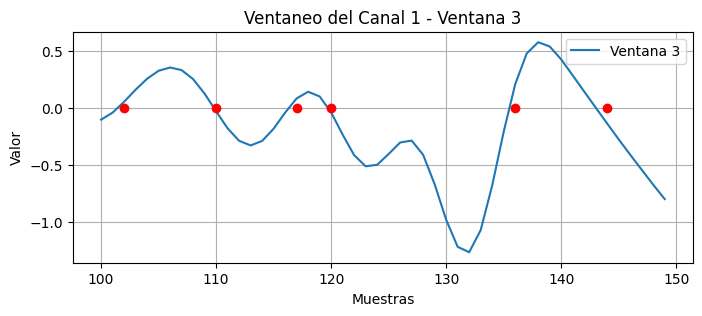

El valor del IEMG de la ventana 4 del Canal 1 es: 22.64
El valor del MAV de la ventana 4 del Canal 1 es: 0.45
El valor del MAV1 de la ventana 4 del Canal 1 es: 0.30
El valor del MAV2 de la ventana 4 del Canal 1 es: -0.28
El valor del SSI de la ventana 4 del Canal 1 es: 15.41


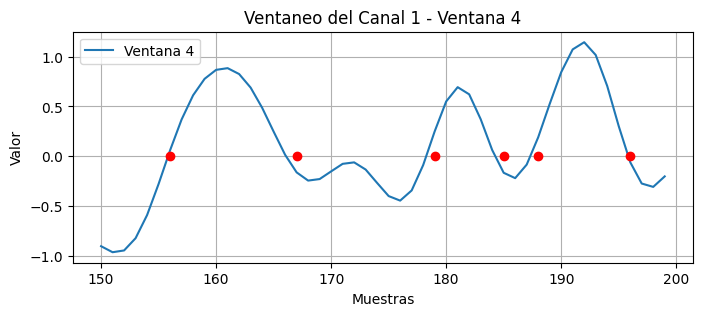

El valor del IEMG de la ventana 5 del Canal 1 es: 22.86
El valor del MAV de la ventana 5 del Canal 1 es: 0.46
El valor del MAV1 de la ventana 5 del Canal 1 es: 0.38
El valor del MAV2 de la ventana 5 del Canal 1 es: -0.58
El valor del SSI de la ventana 5 del Canal 1 es: 15.76


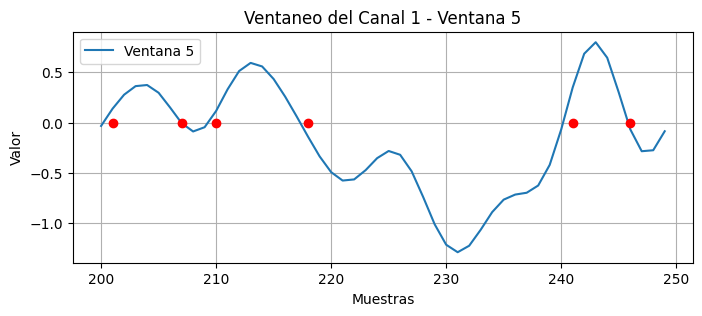

El valor del IEMG de la ventana 6 del Canal 1 es: 14.73
El valor del MAV de la ventana 6 del Canal 1 es: 0.29
El valor del MAV1 de la ventana 6 del Canal 1 es: 0.25
El valor del MAV2 de la ventana 6 del Canal 1 es: -0.44
El valor del SSI de la ventana 6 del Canal 1 es: 6.63


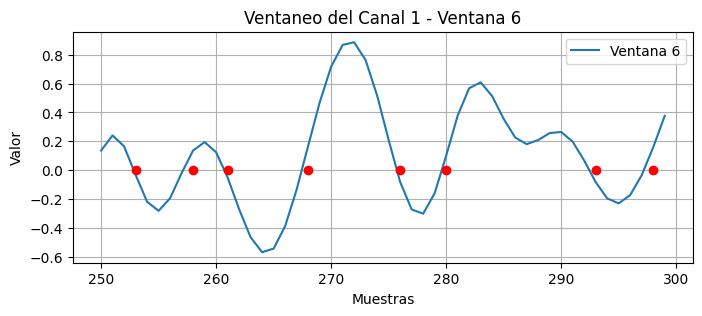

In [7]:
nombre_columna = 'Canal 1'

# Obtener los datos del canal 1 hasta las 300 muestras
canal_1 = df[nombre_columna][:300]

# Tamaño de la ventana (cada 50 muestras)
tamano_ventana = 50

# Función para encontrar y señalar los cruces por cero en una ventana
def encontrar_cruces_por_cero(ventana, indice_inicio):
    indices_cruces = np.where(np.diff(np.sign(ventana)))[0] + 1
    for indice in indices_cruces:
        plt.plot(indice + indice_inicio, 0, 'ro')  # Señalar el cruce por cero con un punto rojo


# Aplicar el ventaneo y graficar cada segmento por separado con cruces por cero señalados
for i in range(0, len(canal_1), tamano_ventana):
    ventana_actual = canal_1[i:i+tamano_ventana]
    plt.figure(figsize=(8, 3))  # Ajusta el tamaño de la figura
    plt.plot(ventana_actual, label=f'Ventana {i // tamano_ventana + 1}')
    
    # Señalar los cruces por cero en la ventana actual
    encontrar_cruces_por_cero(ventana_actual, i)

    #Llamar la funcion IEMG
    iemg_actual = calcular_IEMG(ventana_actual, i // tamano_ventana + 1, nombre_columna)

    #Llamar la funcion MAV
    mav_actual = calcular_mav(ventana_actual, i//tamano_ventana + 1, nombre_columna)

    #Llamar la funcion MAV1
    mav1_actual = calcular_mav1(ventana_actual, i//tamano_ventana + 1, nombre_columna)

    #Llamar la funcion MAV2
    mav2_actual = calcular_mav2(ventana_actual, i//tamano_ventana + 1, nombre_columna)

    #Llamar la funcion ssi
    ssi_actual = calcular_ssi(ventana_actual, i//tamano_ventana + 1, nombre_columna)
    
    plt.title(f'Ventaneo del Canal 1 - Ventana {i // tamano_ventana + 1}')
    plt.xlabel('Muestras')
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)
    plt.show()


## Ventaneo cruces por cero y caracteristicas canal 2

El valor del IEMG de la ventana 1 del Canal 2 es: 58.65
El valor del MAV de la ventana 1 del Canal 2 es: 1.17
El valor del MAV1 de la ventana 1 del Canal 2 es: 0.87
El valor del MAV2 de la ventana 1 del Canal 2 es: -0.97
El valor del SSI de la ventana 1 del Canal 2 es: 88.82


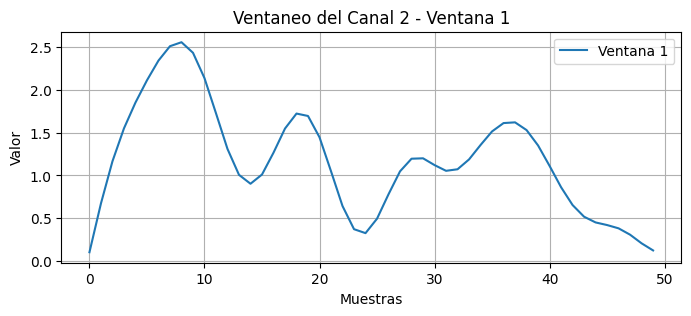

El valor del IEMG de la ventana 2 del Canal 2 es: 17.44
El valor del MAV de la ventana 2 del Canal 2 es: 0.35
El valor del MAV1 de la ventana 2 del Canal 2 es: 0.25
El valor del MAV2 de la ventana 2 del Canal 2 es: -0.34
El valor del SSI de la ventana 2 del Canal 2 es: 10.32


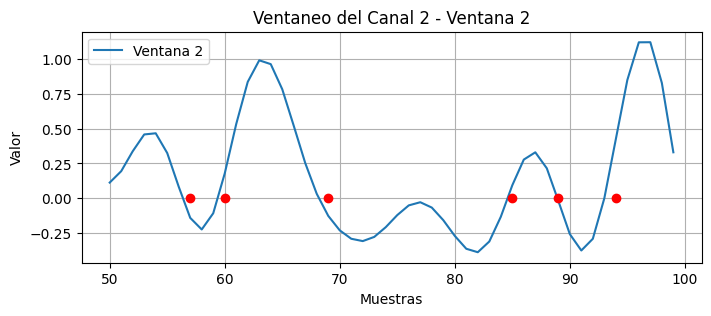

El valor del IEMG de la ventana 3 del Canal 2 es: 21.89
El valor del MAV de la ventana 3 del Canal 2 es: 0.44
El valor del MAV1 de la ventana 3 del Canal 2 es: 0.30
El valor del MAV2 de la ventana 3 del Canal 2 es: -0.34
El valor del SSI de la ventana 3 del Canal 2 es: 12.53


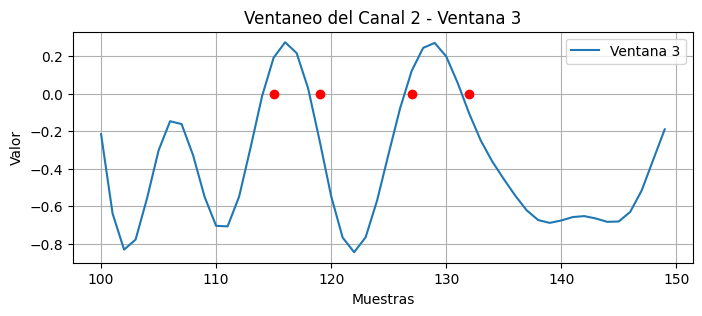

El valor del IEMG de la ventana 4 del Canal 2 es: 23.76
El valor del MAV de la ventana 4 del Canal 2 es: 0.48
El valor del MAV1 de la ventana 4 del Canal 2 es: 0.36
El valor del MAV2 de la ventana 4 del Canal 2 es: -0.43
El valor del SSI de la ventana 4 del Canal 2 es: 17.31


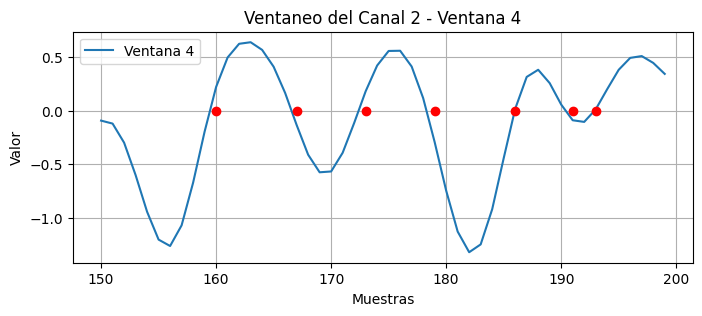

El valor del IEMG de la ventana 5 del Canal 2 es: 18.89
El valor del MAV de la ventana 5 del Canal 2 es: 0.38
El valor del MAV1 de la ventana 5 del Canal 2 es: 0.24
El valor del MAV2 de la ventana 5 del Canal 2 es: -0.22
El valor del SSI de la ventana 5 del Canal 2 es: 11.84


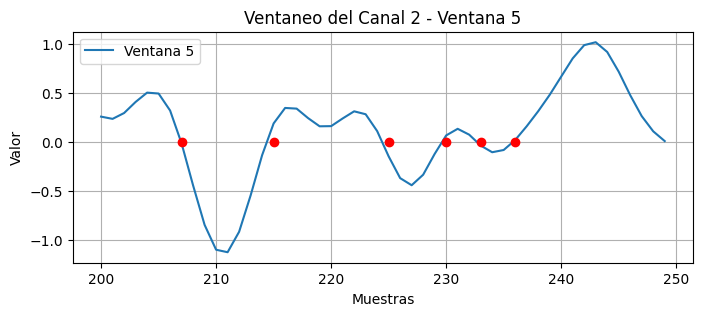

El valor del IEMG de la ventana 6 del Canal 2 es: 20.70
El valor del MAV de la ventana 6 del Canal 2 es: 0.41
El valor del MAV1 de la ventana 6 del Canal 2 es: 0.32
El valor del MAV2 de la ventana 6 del Canal 2 es: -0.43
El valor del SSI de la ventana 6 del Canal 2 es: 12.17


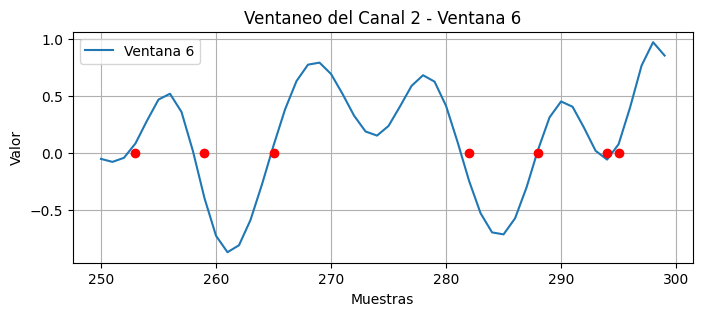

In [8]:
nombre_columna = 'Canal 2'

# Obtener los datos del canal 2 hasta las 300 muestras
canal_2 = df[nombre_columna][:300]


# Aplicar el ventaneo y graficar cada segmento por separado con cruces por cero señalados
for i in range(0, len(canal_2), tamano_ventana):
    ventana_actual = canal_2[i:i+tamano_ventana]
    plt.figure(figsize=(8, 3))  # Ajusta el tamaño de la figura
    plt.plot(ventana_actual, label=f'Ventana {i // tamano_ventana + 1}')
    
    # Señalar los cruces por cero en la ventana actual
    encontrar_cruces_por_cero(ventana_actual, i)

    #Llamar la funcion IEMG
    iemg_actual = calcular_IEMG(ventana_actual, i // tamano_ventana + 1, nombre_columna)

    #Llamar la funcion MAV
    mav_actual = calcular_mav(ventana_actual, i//tamano_ventana + 1, nombre_columna)

    #Llamar la funcion MAV1
    mav1_actual = calcular_mav1(ventana_actual, i//tamano_ventana + 1, nombre_columna)

    #Llamar la funcion MAV2
    mav2_actual = calcular_mav2(ventana_actual, i//tamano_ventana + 1, nombre_columna)

    #Llamar la funcion ssi
    ssi_actual = calcular_ssi(ventana_actual, i//tamano_ventana + 1, nombre_columna)
    
    plt.title(f'Ventaneo del Canal 2 - Ventana {i // tamano_ventana + 1}')
    plt.xlabel('Muestras')
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)
    plt.show()

## Ventaneo cruces por cero y caracteristicas canal 3

El valor del IEMG de la ventana 1 del Canal 3 es: 15.73
El valor del MAV de la ventana 1 del Canal 3 es: 0.31
El valor del MAV1 de la ventana 1 del Canal 3 es: 0.24
El valor del MAV2 de la ventana 1 del Canal 3 es: -0.34
El valor del SSI de la ventana 1 del Canal 3 es: 6.33


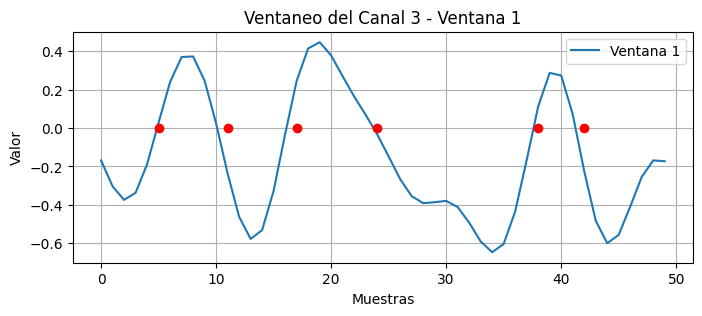

El valor del IEMG de la ventana 2 del Canal 3 es: 15.55
El valor del MAV de la ventana 2 del Canal 3 es: 0.31
El valor del MAV1 de la ventana 2 del Canal 3 es: 0.22
El valor del MAV2 de la ventana 2 del Canal 3 es: -0.26
El valor del SSI de la ventana 2 del Canal 3 es: 7.24


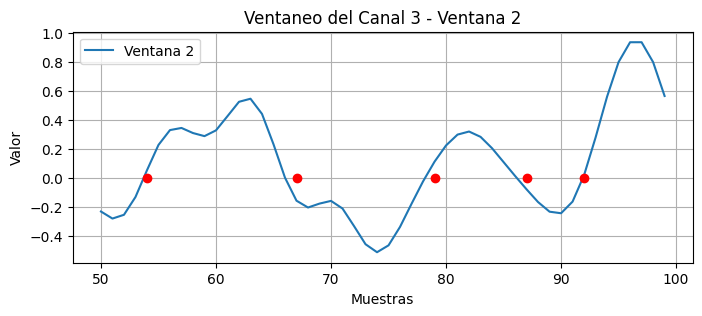

El valor del IEMG de la ventana 3 del Canal 3 es: 17.95
El valor del MAV de la ventana 3 del Canal 3 es: 0.36
El valor del MAV1 de la ventana 3 del Canal 3 es: 0.28
El valor del MAV2 de la ventana 3 del Canal 3 es: -0.36
El valor del SSI de la ventana 3 del Canal 3 es: 10.69


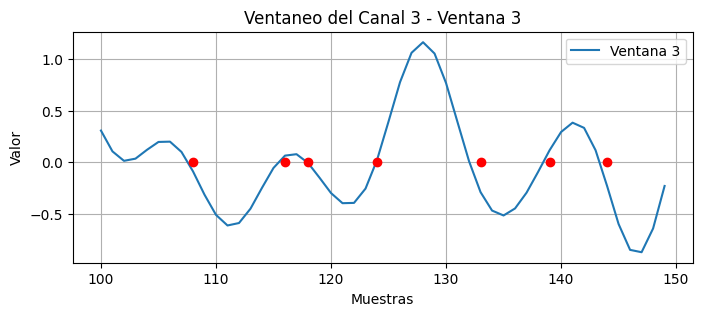

El valor del IEMG de la ventana 4 del Canal 3 es: 22.17
El valor del MAV de la ventana 4 del Canal 3 es: 0.44
El valor del MAV1 de la ventana 4 del Canal 3 es: 0.35
El valor del MAV2 de la ventana 4 del Canal 3 es: -0.43
El valor del SSI de la ventana 4 del Canal 3 es: 16.83


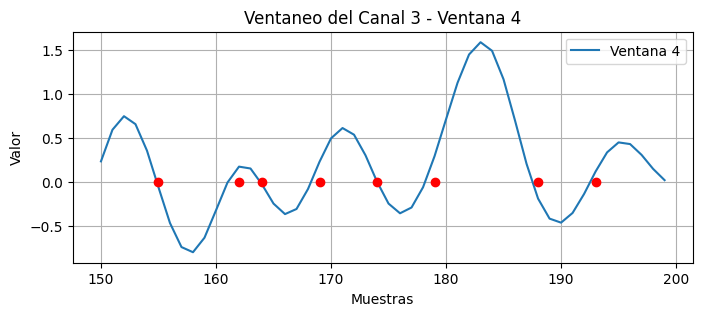

El valor del IEMG de la ventana 5 del Canal 3 es: 16.82
El valor del MAV de la ventana 5 del Canal 3 es: 0.34
El valor del MAV1 de la ventana 5 del Canal 3 es: 0.22
El valor del MAV2 de la ventana 5 del Canal 3 es: -0.21
El valor del SSI de la ventana 5 del Canal 3 es: 8.11


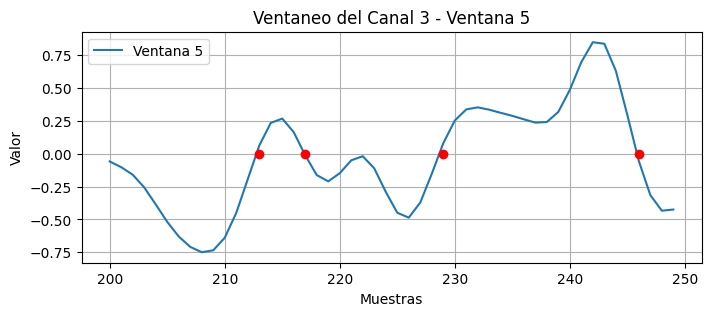

El valor del IEMG de la ventana 6 del Canal 3 es: 15.12
El valor del MAV de la ventana 6 del Canal 3 es: 0.30
El valor del MAV1 de la ventana 6 del Canal 3 es: 0.27
El valor del MAV2 de la ventana 6 del Canal 3 es: -0.47
El valor del SSI de la ventana 6 del Canal 3 es: 8.62


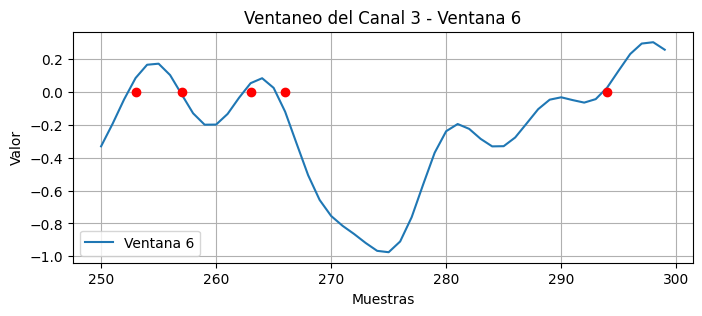

In [9]:
nombre_columna = 'Canal 3'

# Obtener los datos del canal 3 hasta las 300 muestras
canal_3 = df[nombre_columna][:300]


# Aplicar el ventaneo y graficar cada segmento por separado con cruces por cero señalados
for i in range(0, len(canal_3), tamano_ventana):
    ventana_actual = canal_3[i:i+tamano_ventana]
    plt.figure(figsize=(8, 3))  # Ajusta el tamaño de la figura
    plt.plot(ventana_actual, label=f'Ventana {i // tamano_ventana + 1}')
    
    # Señalar los cruces por cero en la ventana actual
    encontrar_cruces_por_cero(ventana_actual, i)

    #Llamar la funcion IEMG
    iemg_actual = calcular_IEMG(ventana_actual, i // tamano_ventana + 1, nombre_columna)

    #Llamar la funcion MAV
    mav_actual = calcular_mav(ventana_actual, i//tamano_ventana + 1, nombre_columna)

    #Llamar la funcion MAV1
    mav1_actual = calcular_mav1(ventana_actual, i//tamano_ventana + 1, nombre_columna)

    #Llamar la funcion MAV2
    mav2_actual = calcular_mav2(ventana_actual, i//tamano_ventana + 1, nombre_columna)

    #Llamar la funcion ssi
    ssi_actual = calcular_ssi(ventana_actual, i//tamano_ventana + 1, nombre_columna)
    
    plt.title(f'Ventaneo del Canal 3 - Ventana {i // tamano_ventana + 1}')
    plt.xlabel('Muestras')
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)
    plt.show()

## Ventaneo cruces por cero y caracteristicas canal 4

El valor del IEMG de la ventana 1 del Canal 4 es: 38.84
El valor del MAV de la ventana 1 del Canal 4 es: 0.78
El valor del MAV1 de la ventana 1 del Canal 4 es: 0.64
El valor del MAV2 de la ventana 1 del Canal 4 es: -1.00
El valor del SSI de la ventana 1 del Canal 4 es: 37.89


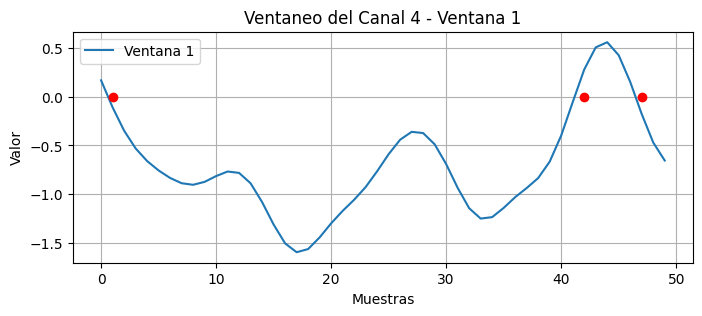

El valor del IEMG de la ventana 2 del Canal 4 es: 14.86
El valor del MAV de la ventana 2 del Canal 4 es: 0.30
El valor del MAV1 de la ventana 2 del Canal 4 es: 0.22
El valor del MAV2 de la ventana 2 del Canal 4 es: -0.25
El valor del SSI de la ventana 2 del Canal 4 es: 6.52


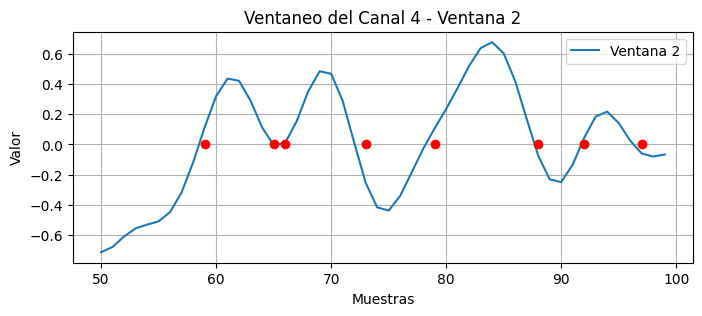

El valor del IEMG de la ventana 3 del Canal 4 es: 17.39
El valor del MAV de la ventana 3 del Canal 4 es: 0.35
El valor del MAV1 de la ventana 3 del Canal 4 es: 0.23
El valor del MAV2 de la ventana 3 del Canal 4 es: -0.14
El valor del SSI de la ventana 3 del Canal 4 es: 10.29


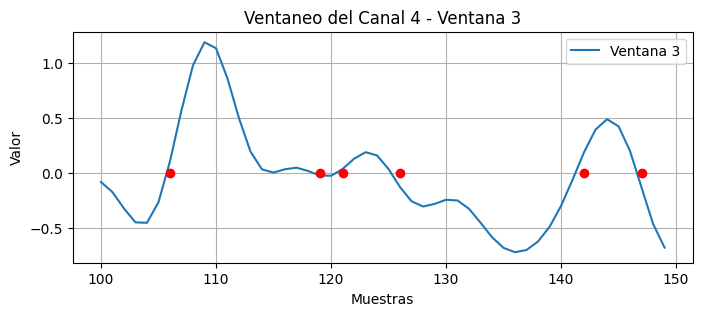

El valor del IEMG de la ventana 4 del Canal 4 es: 18.84
El valor del MAV de la ventana 4 del Canal 4 es: 0.38
El valor del MAV1 de la ventana 4 del Canal 4 es: 0.25
El valor del MAV2 de la ventana 4 del Canal 4 es: -0.23
El valor del SSI de la ventana 4 del Canal 4 es: 11.10


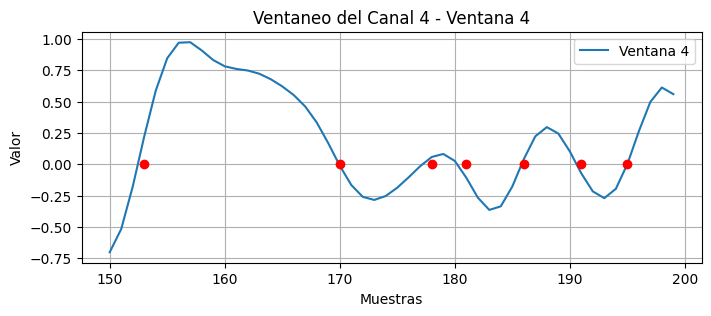

El valor del IEMG de la ventana 5 del Canal 4 es: 21.55
El valor del MAV de la ventana 5 del Canal 4 es: 0.43
El valor del MAV1 de la ventana 5 del Canal 4 es: 0.33
El valor del MAV2 de la ventana 5 del Canal 4 es: -0.54
El valor del SSI de la ventana 5 del Canal 4 es: 13.49


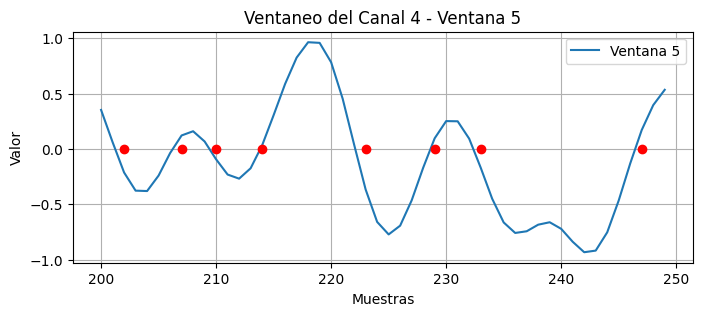

El valor del IEMG de la ventana 6 del Canal 4 es: 19.73
El valor del MAV de la ventana 6 del Canal 4 es: 0.39
El valor del MAV1 de la ventana 6 del Canal 4 es: 0.29
El valor del MAV2 de la ventana 6 del Canal 4 es: -0.37
El valor del SSI de la ventana 6 del Canal 4 es: 10.50


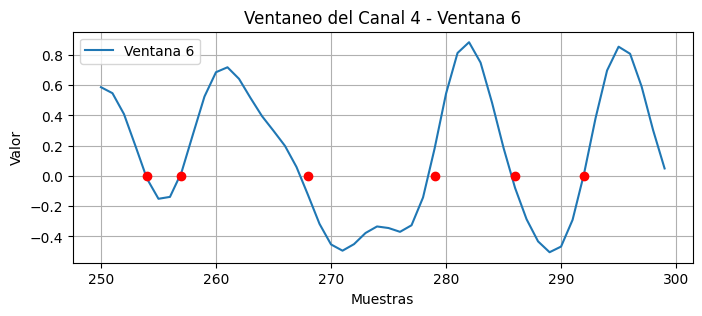

In [10]:
nombre_columna = 'Canal 4'

# Obtener los datos del canal 4 hasta las 300 muestras
canal_4 = df[nombre_columna][:300]

# Aplicar el ventaneo y graficar cada segmento por separado con cruces por cero señalados
for i in range(0, len(canal_4), tamano_ventana):
    ventana_actual = canal_4[i:i+tamano_ventana]
    plt.figure(figsize=(8, 3))  # Ajusta el tamaño de la figura
    plt.plot(ventana_actual, label=f'Ventana {i // tamano_ventana + 1}')
    
    # Señalar los cruces por cero en la ventana actual
    encontrar_cruces_por_cero(ventana_actual, i)

    #Llamar la funcion IEMG
    iemg_actual = calcular_IEMG(ventana_actual, i // tamano_ventana + 1, nombre_columna)

    #Llamar la funcion MAV
    mav_actual = calcular_mav(ventana_actual, i//tamano_ventana + 1, nombre_columna)

    #Llamar la funcion MAV1
    mav1_actual = calcular_mav1(ventana_actual, i//tamano_ventana + 1, nombre_columna)

    #Llamar la funcion MAV2
    mav2_actual = calcular_mav2(ventana_actual, i//tamano_ventana + 1, nombre_columna)

    #Llamar la funcion ssi
    ssi_actual = calcular_ssi(ventana_actual, i//tamano_ventana + 1, nombre_columna)
    
    plt.title(f'Ventaneo del Canal 4 - Ventana {i // tamano_ventana + 1}')
    plt.xlabel('Muestras')
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)
    plt.show()

## Ventaneo cruces por cero y caracteristicas canal 5

El valor del IEMG de la ventana 1 del Canal 5 es: 70.48
El valor del MAV de la ventana 1 del Canal 5 es: 1.41
El valor del MAV1 de la ventana 1 del Canal 5 es: 1.07
El valor del MAV2 de la ventana 1 del Canal 5 es: -1.46
El valor del SSI de la ventana 1 del Canal 5 es: 107.42


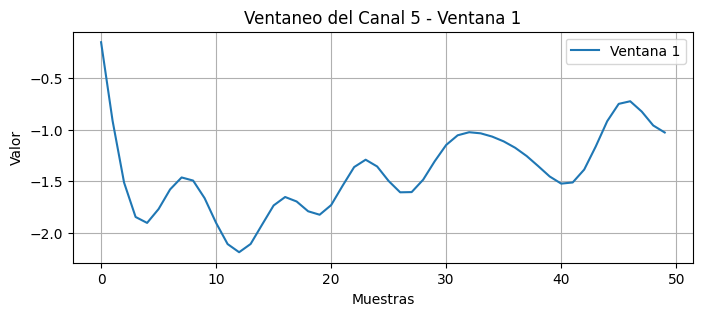

El valor del IEMG de la ventana 2 del Canal 5 es: 17.53
El valor del MAV de la ventana 2 del Canal 5 es: 0.35
El valor del MAV1 de la ventana 2 del Canal 5 es: 0.24
El valor del MAV2 de la ventana 2 del Canal 5 es: -0.28
El valor del SSI de la ventana 2 del Canal 5 es: 10.41


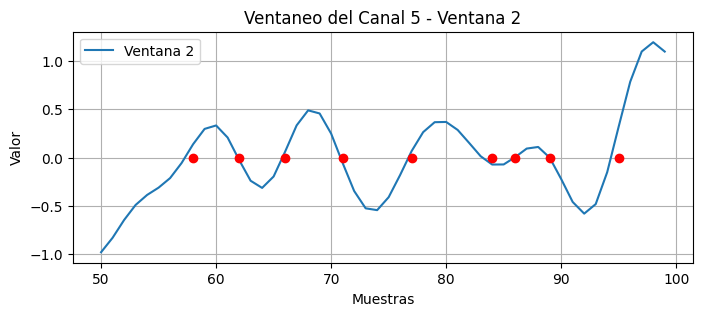

El valor del IEMG de la ventana 3 del Canal 5 es: 21.53
El valor del MAV de la ventana 3 del Canal 5 es: 0.43
El valor del MAV1 de la ventana 3 del Canal 5 es: 0.32
El valor del MAV2 de la ventana 3 del Canal 5 es: -0.43
El valor del SSI de la ventana 3 del Canal 5 es: 13.81


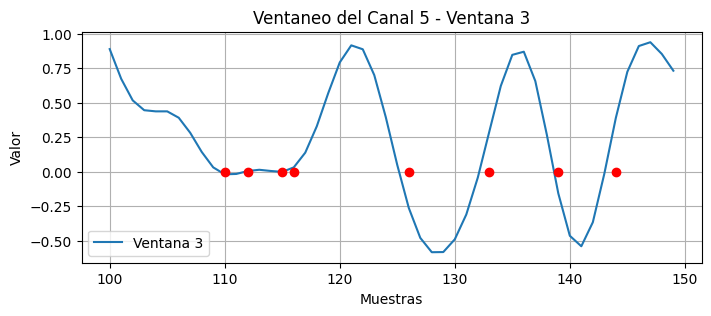

El valor del IEMG de la ventana 4 del Canal 5 es: 20.28
El valor del MAV de la ventana 4 del Canal 5 es: 0.41
El valor del MAV1 de la ventana 4 del Canal 5 es: 0.32
El valor del MAV2 de la ventana 4 del Canal 5 es: -0.51
El valor del SSI de la ventana 4 del Canal 5 es: 13.72


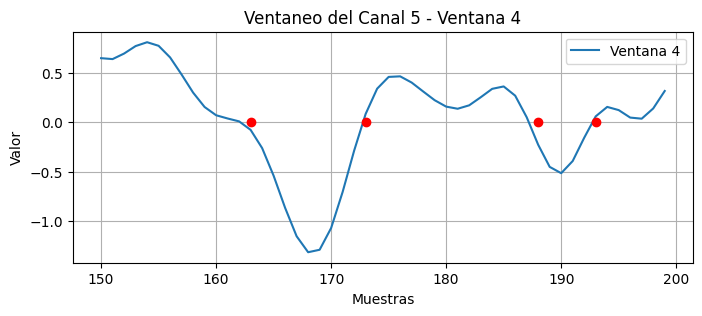

El valor del IEMG de la ventana 5 del Canal 5 es: 17.12
El valor del MAV de la ventana 5 del Canal 5 es: 0.34
El valor del MAV1 de la ventana 5 del Canal 5 es: 0.23
El valor del MAV2 de la ventana 5 del Canal 5 es: -0.17
El valor del SSI de la ventana 5 del Canal 5 es: 9.76


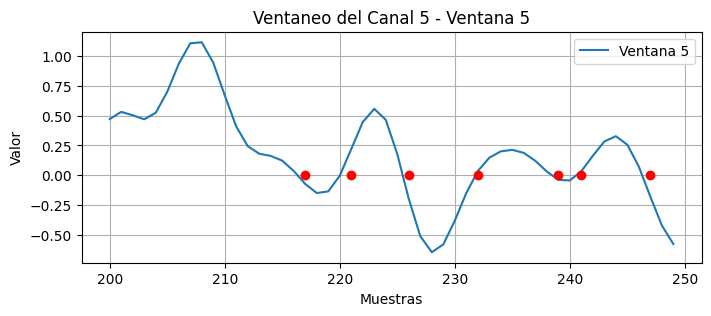

El valor del IEMG de la ventana 6 del Canal 5 es: 17.90
El valor del MAV de la ventana 6 del Canal 5 es: 0.36
El valor del MAV1 de la ventana 6 del Canal 5 es: 0.28
El valor del MAV2 de la ventana 6 del Canal 5 es: -0.37
El valor del SSI de la ventana 6 del Canal 5 es: 9.16


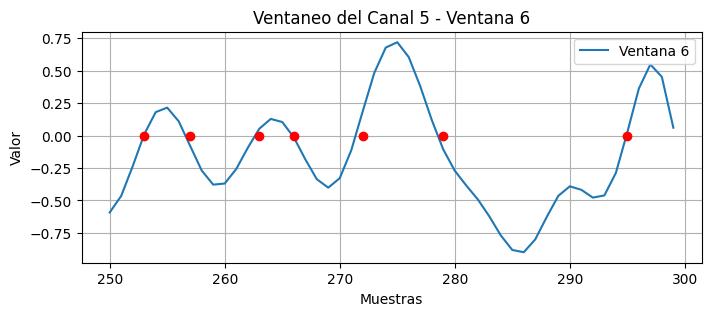

In [11]:
nombre_columna = 'Canal 5'

# Obtener los datos del canal 5 hasta las 300 muestras
canal_5 = df[nombre_columna][:300]


# Aplicar el ventaneo y graficar cada segmento por separado con cruces por cero señalados
for i in range(0, len(canal_5), tamano_ventana):
    ventana_actual = canal_5[i:i+tamano_ventana]
    plt.figure(figsize=(8, 3))  # Ajusta el tamaño de la figura
    plt.plot(ventana_actual, label=f'Ventana {i // tamano_ventana + 1}')
    
    # Señalar los cruces por cero en la ventana actual
    encontrar_cruces_por_cero(ventana_actual, i)

    #Llamar la funcion IEMG
    iemg_actual = calcular_IEMG(ventana_actual, i // tamano_ventana + 1, nombre_columna)

    #Llamar la funcion MAV
    mav_actual = calcular_mav(ventana_actual, i//tamano_ventana + 1, nombre_columna)

    #Llamar la funcion MAV1
    mav1_actual = calcular_mav1(ventana_actual, i//tamano_ventana + 1, nombre_columna)

    #Llamar la funcion MAV2
    mav2_actual = calcular_mav2(ventana_actual, i//tamano_ventana + 1, nombre_columna)

    #Llamar la funcion ssi
    ssi_actual = calcular_ssi(ventana_actual, i//tamano_ventana + 1, nombre_columna)
    
    plt.title(f'Ventaneo del Canal 5 - Ventana {i // tamano_ventana + 1}')
    plt.xlabel('Muestras')
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)
    plt.show()

## Ventaneo cruces por cero y caracteristicas canal 6

El valor del IEMG de la ventana 1 del Canal 6 es: 31.05
El valor del MAV de la ventana 1 del Canal 6 es: 0.62
El valor del MAV1 de la ventana 1 del Canal 6 es: 0.43
El valor del MAV2 de la ventana 1 del Canal 6 es: -0.40
El valor del SSI de la ventana 1 del Canal 6 es: 26.54


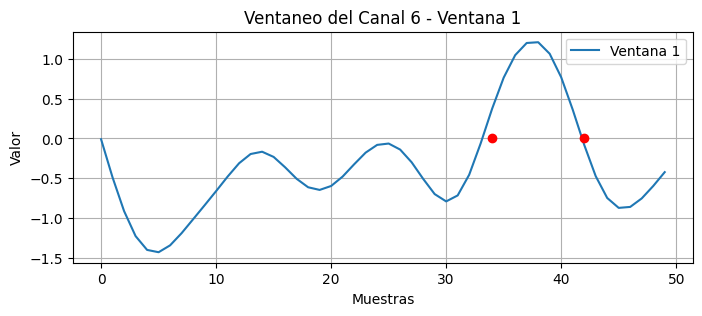

El valor del IEMG de la ventana 2 del Canal 6 es: 13.10
El valor del MAV de la ventana 2 del Canal 6 es: 0.26
El valor del MAV1 de la ventana 2 del Canal 6 es: 0.20
El valor del MAV2 de la ventana 2 del Canal 6 es: -0.24
El valor del SSI de la ventana 2 del Canal 6 es: 5.30


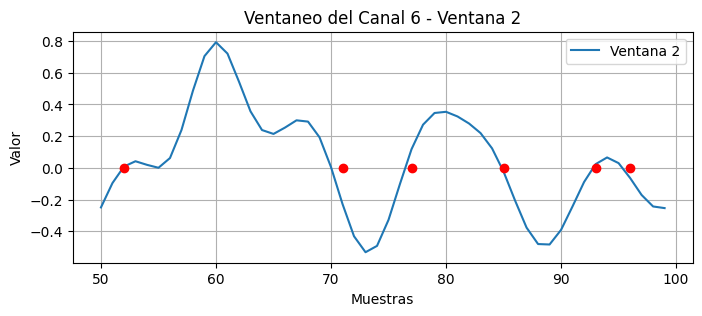

El valor del IEMG de la ventana 3 del Canal 6 es: 14.85
El valor del MAV de la ventana 3 del Canal 6 es: 0.30
El valor del MAV1 de la ventana 3 del Canal 6 es: 0.24
El valor del MAV2 de la ventana 3 del Canal 6 es: -0.39
El valor del SSI de la ventana 3 del Canal 6 es: 8.76


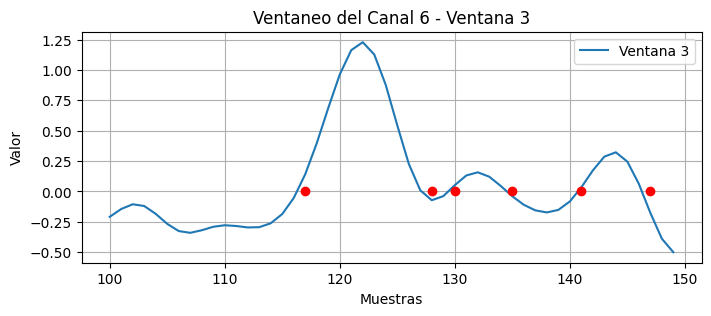

El valor del IEMG de la ventana 4 del Canal 6 es: 12.87
El valor del MAV de la ventana 4 del Canal 6 es: 0.26
El valor del MAV1 de la ventana 4 del Canal 6 es: 0.19
El valor del MAV2 de la ventana 4 del Canal 6 es: -0.25
El valor del SSI de la ventana 4 del Canal 6 es: 5.25


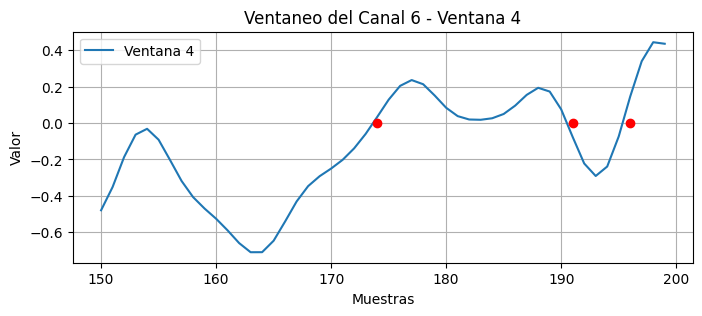

El valor del IEMG de la ventana 5 del Canal 6 es: 21.04
El valor del MAV de la ventana 5 del Canal 6 es: 0.42
El valor del MAV1 de la ventana 5 del Canal 6 es: 0.31
El valor del MAV2 de la ventana 5 del Canal 6 es: -0.37
El valor del SSI de la ventana 5 del Canal 6 es: 13.95


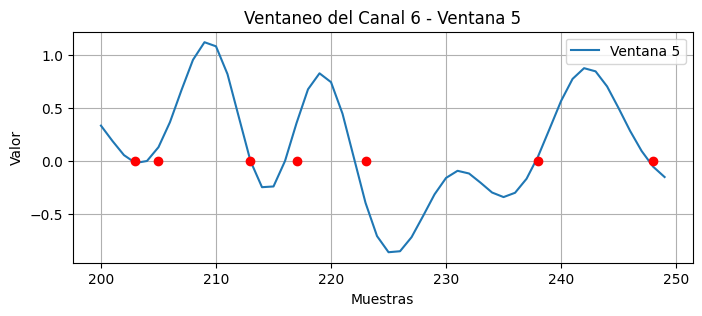

El valor del IEMG de la ventana 6 del Canal 6 es: 19.50
El valor del MAV de la ventana 6 del Canal 6 es: 0.39
El valor del MAV1 de la ventana 6 del Canal 6 es: 0.29
El valor del MAV2 de la ventana 6 del Canal 6 es: -0.44
El valor del SSI de la ventana 6 del Canal 6 es: 11.44


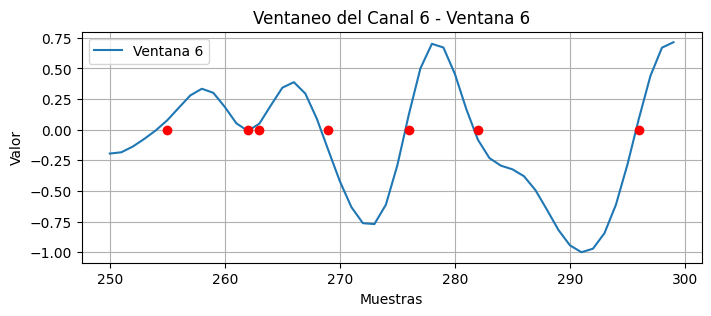

In [12]:
nombre_columna = 'Canal 6'

# Obtener los datos del canal 6 hasta las 300 muestras
canal_6 = df[nombre_columna][:300]

# Aplicar el ventaneo y graficar cada segmento por separado con cruces por cero señalados
for i in range(0, len(canal_6), tamano_ventana):
    ventana_actual = canal_6[i:i+tamano_ventana]
    plt.figure(figsize=(8, 3))  # Ajusta el tamaño de la figura
    plt.plot(ventana_actual, label=f'Ventana {i // tamano_ventana + 1}')
    
    # Señalar los cruces por cero en la ventana actual
    encontrar_cruces_por_cero(ventana_actual, i)

    #Llamar la funcion IEMG
    iemg_actual = calcular_IEMG(ventana_actual, i // tamano_ventana + 1, nombre_columna)

    #Llamar la funcion MAV
    mav_actual = calcular_mav(ventana_actual, i//tamano_ventana + 1, nombre_columna)

    #Llamar la funcion MAV1
    mav1_actual = calcular_mav1(ventana_actual, i//tamano_ventana + 1, nombre_columna)

    #Llamar la funcion MAV2
    mav2_actual = calcular_mav2(ventana_actual, i//tamano_ventana + 1, nombre_columna)

    #Llamar la funcion ssi
    ssi_actual = calcular_ssi(ventana_actual, i//tamano_ventana + 1, nombre_columna)
    
    plt.title(f'Ventaneo del Canal 6 - Ventana {i // tamano_ventana + 1}')
    plt.xlabel('Muestras')
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)
    plt.show()

## Ventaneo cruces por cero y caracteristicas canal 7

El valor del IEMG de la ventana 1 del Canal 7 es: 29.57
El valor del MAV de la ventana 1 del Canal 7 es: 0.59
El valor del MAV1 de la ventana 1 del Canal 7 es: 0.44
El valor del MAV2 de la ventana 1 del Canal 7 es: -0.52
El valor del SSI de la ventana 1 del Canal 7 es: 25.32


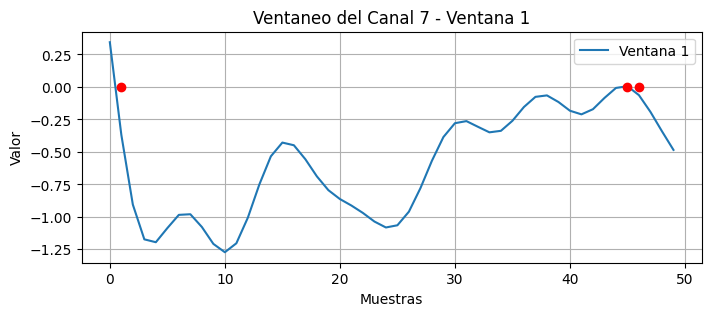

El valor del IEMG de la ventana 2 del Canal 7 es: 24.88
El valor del MAV de la ventana 2 del Canal 7 es: 0.50
El valor del MAV1 de la ventana 2 del Canal 7 es: 0.39
El valor del MAV2 de la ventana 2 del Canal 7 es: -0.56
El valor del SSI de la ventana 2 del Canal 7 es: 18.35


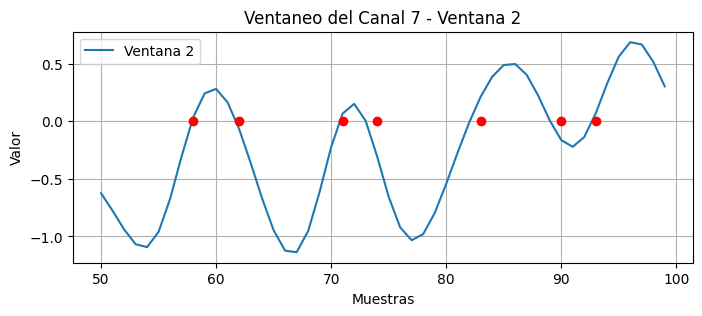

El valor del IEMG de la ventana 3 del Canal 7 es: 21.96
El valor del MAV de la ventana 3 del Canal 7 es: 0.44
El valor del MAV1 de la ventana 3 del Canal 7 es: 0.31
El valor del MAV2 de la ventana 3 del Canal 7 es: -0.44
El valor del SSI de la ventana 3 del Canal 7 es: 17.40


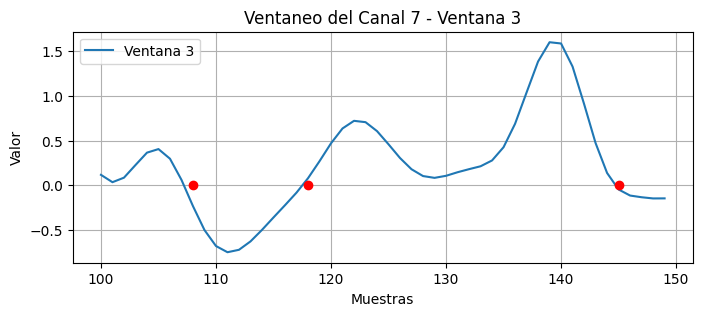

El valor del IEMG de la ventana 4 del Canal 7 es: 18.29
El valor del MAV de la ventana 4 del Canal 7 es: 0.37
El valor del MAV1 de la ventana 4 del Canal 7 es: 0.28
El valor del MAV2 de la ventana 4 del Canal 7 es: -0.41
El valor del SSI de la ventana 4 del Canal 7 es: 11.54


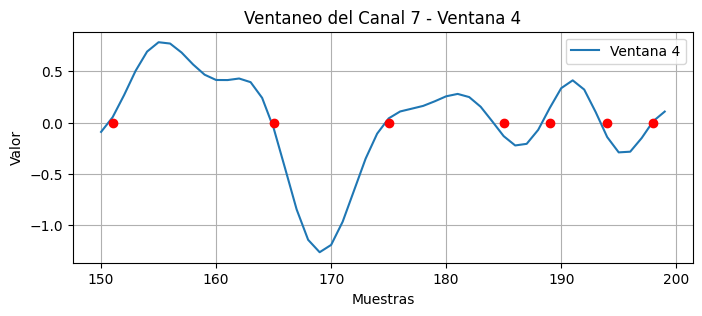

El valor del IEMG de la ventana 5 del Canal 7 es: 11.81
El valor del MAV de la ventana 5 del Canal 7 es: 0.24
El valor del MAV1 de la ventana 5 del Canal 7 es: 0.17
El valor del MAV2 de la ventana 5 del Canal 7 es: -0.18
El valor del SSI de la ventana 5 del Canal 7 es: 4.25


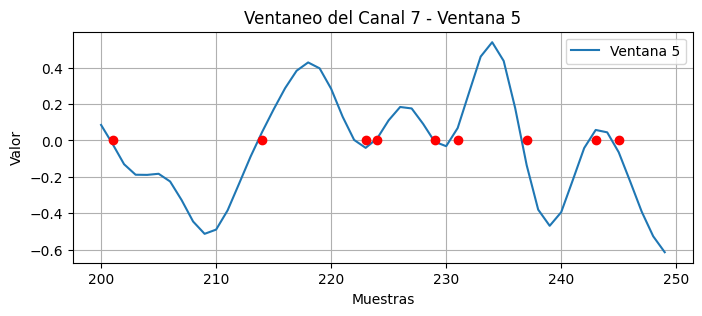

El valor del IEMG de la ventana 6 del Canal 7 es: 18.37
El valor del MAV de la ventana 6 del Canal 7 es: 0.37
El valor del MAV1 de la ventana 6 del Canal 7 es: 0.28
El valor del MAV2 de la ventana 6 del Canal 7 es: -0.35
El valor del SSI de la ventana 6 del Canal 7 es: 10.53


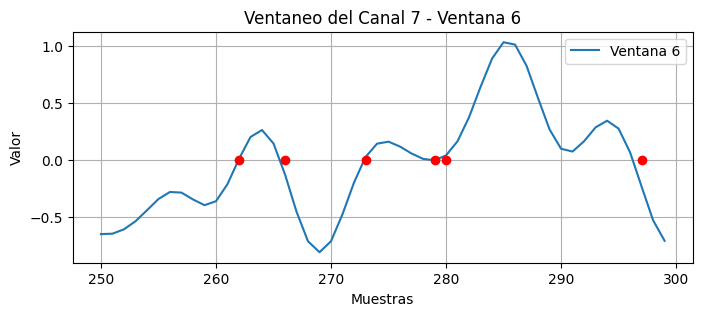

In [13]:
nombre_columna = 'Canal 7'

# Obtener los datos del canal 7 hasta las 300 muestras
canal_7 = df[nombre_columna][:300]

# Aplicar el ventaneo y graficar cada segmento por separado con cruces por cero señalados
for i in range(0, len(canal_7), tamano_ventana):
    ventana_actual = canal_7[i:i+tamano_ventana]
    plt.figure(figsize=(8, 3))  # Ajusta el tamaño de la figura
    plt.plot(ventana_actual, label=f'Ventana {i // tamano_ventana + 1}')
    
    # Señalar los cruces por cero en la ventana actual
    encontrar_cruces_por_cero(ventana_actual, i)

    #Llamar la funcion IEMG
    iemg_actual = calcular_IEMG(ventana_actual, i // tamano_ventana + 1, nombre_columna)

    #Llamar la funcion MAV
    mav_actual = calcular_mav(ventana_actual, i//tamano_ventana + 1, nombre_columna)

    #Llamar la funcion MAV1
    mav1_actual = calcular_mav1(ventana_actual, i//tamano_ventana + 1, nombre_columna)

    #Llamar la funcion MAV2
    mav2_actual = calcular_mav2(ventana_actual, i//tamano_ventana + 1, nombre_columna)

    #Llamar la funcion ssi
    ssi_actual = calcular_ssi(ventana_actual, i//tamano_ventana + 1, nombre_columna)
    
    plt.title(f'Ventaneo del Canal 7 - Ventana {i // tamano_ventana + 1}')
    plt.xlabel('Muestras')
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)
    plt.show()

## Ventaneo cruces por cero y caracteristicas canal 8

El valor del IEMG de la ventana 1 del Canal 8 es: 36.19
El valor del MAV de la ventana 1 del Canal 8 es: 0.72
El valor del MAV1 de la ventana 1 del Canal 8 es: 0.51
El valor del MAV2 de la ventana 1 del Canal 8 es: -0.50
El valor del SSI de la ventana 1 del Canal 8 es: 36.39


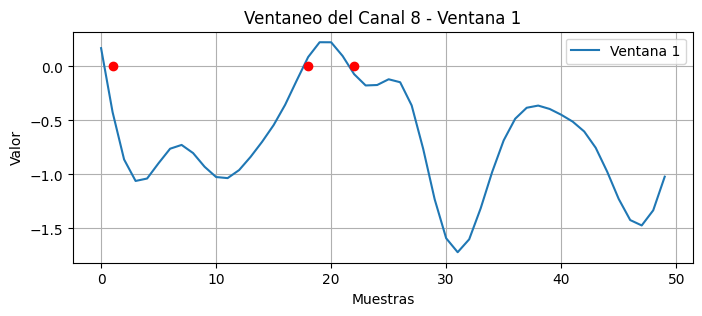

El valor del IEMG de la ventana 2 del Canal 8 es: 20.26
El valor del MAV de la ventana 2 del Canal 8 es: 0.41
El valor del MAV1 de la ventana 2 del Canal 8 es: 0.30
El valor del MAV2 de la ventana 2 del Canal 8 es: -0.39
El valor del SSI de la ventana 2 del Canal 8 es: 11.49


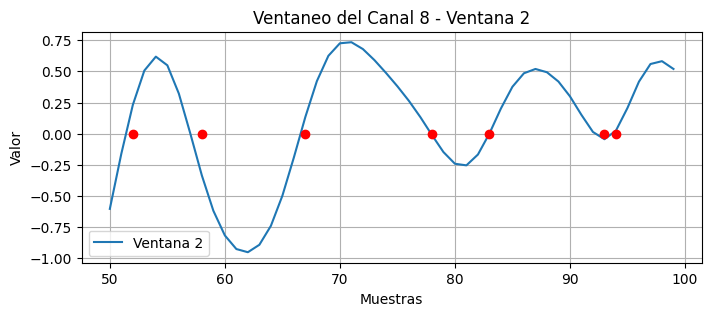

El valor del IEMG de la ventana 3 del Canal 8 es: 17.91
El valor del MAV de la ventana 3 del Canal 8 es: 0.36
El valor del MAV1 de la ventana 3 del Canal 8 es: 0.24
El valor del MAV2 de la ventana 3 del Canal 8 es: -0.22
El valor del SSI de la ventana 3 del Canal 8 es: 9.69


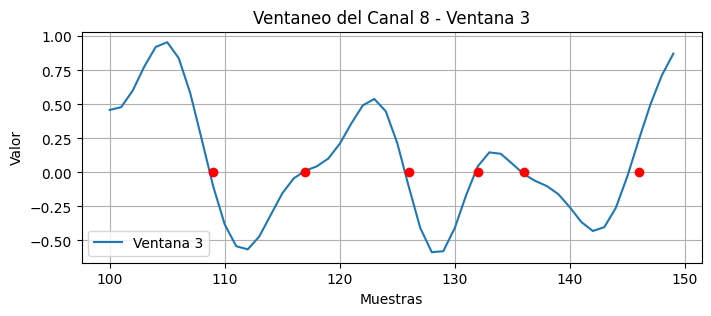

El valor del IEMG de la ventana 4 del Canal 8 es: 22.62
El valor del MAV de la ventana 4 del Canal 8 es: 0.45
El valor del MAV1 de la ventana 4 del Canal 8 es: 0.34
El valor del MAV2 de la ventana 4 del Canal 8 es: -0.44
El valor del SSI de la ventana 4 del Canal 8 es: 14.07


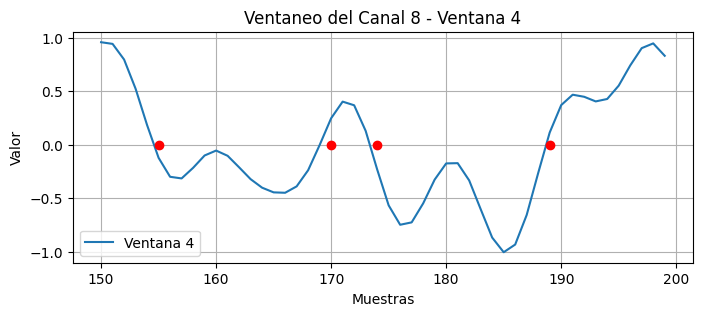

El valor del IEMG de la ventana 5 del Canal 8 es: 12.84
El valor del MAV de la ventana 5 del Canal 8 es: 0.26
El valor del MAV1 de la ventana 5 del Canal 8 es: 0.20
El valor del MAV2 de la ventana 5 del Canal 8 es: -0.28
El valor del SSI de la ventana 5 del Canal 8 es: 5.23


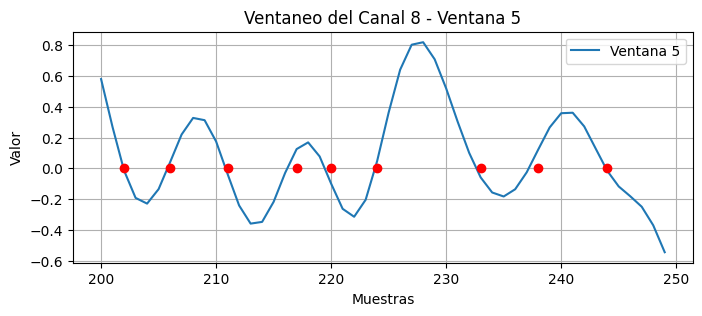

El valor del IEMG de la ventana 6 del Canal 8 es: 19.29
El valor del MAV de la ventana 6 del Canal 8 es: 0.39
El valor del MAV1 de la ventana 6 del Canal 8 es: 0.27
El valor del MAV2 de la ventana 6 del Canal 8 es: -0.30
El valor del SSI de la ventana 6 del Canal 8 es: 10.23


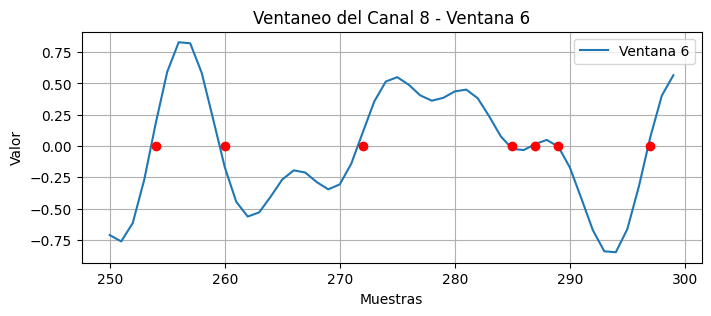

In [14]:
nombre_columna = 'Canal 8'

# Obtener los datos del canal 8 hasta las 300 muestras
canal_8 = df[nombre_columna][:300]

# Aplicar el ventaneo y graficar cada segmento por separado con cruces por cero señalados
for i in range(0, len(canal_8), tamano_ventana):
    ventana_actual = canal_8[i:i+tamano_ventana]
    plt.figure(figsize=(8, 3))  # Ajusta el tamaño de la figura
    plt.plot(ventana_actual, label=f'Ventana {i // tamano_ventana + 1}')
    
    # Señalar los cruces por cero en la ventana actual
    encontrar_cruces_por_cero(ventana_actual, i)

    #Llamar la funcion IEMG
    iemg_actual = calcular_IEMG(ventana_actual, i // tamano_ventana + 1, nombre_columna)

    #Llamar la funcion MAV
    mav_actual = calcular_mav(ventana_actual, i//tamano_ventana + 1, nombre_columna)

    #Llamar la funcion MAV1
    mav1_actual = calcular_mav1(ventana_actual, i//tamano_ventana + 1, nombre_columna)

    #Llamar la funcion MAV2
    mav2_actual = calcular_mav2(ventana_actual, i//tamano_ventana + 1, nombre_columna)

    #Llamar la funcion ssi
    ssi_actual = calcular_ssi(ventana_actual, i//tamano_ventana + 1, nombre_columna)
    
    plt.title(f'Ventaneo del Canal 8 - Ventana {i // tamano_ventana + 1}')
    plt.xlabel('Muestras')
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)
    plt.show()